In [1]:
# изобразить количество хитов 5 команд за все время по годам


In [2]:
import pandas as pd 
import numpy as np
import pyarrow.parquet as pq
import matplotlib
import matplotlib.pyplot as plt
from pandas import read_csv, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score



In [3]:
# df = pq.read_parquet(source = 'C:\Users\mihai\JupyterLab\Поебаться\Users.parquet')
UsersData = pd.read_parquet('Users.parquet', engine='fastparquet')
UsersData.columns

UsersData = UsersData[['UserID','UserEmail','TeamID','Name','IsActive','DateRegister']]
UsersData
# UsersData = pd.read_parquet('Users.parquet', engine='fastparquet')
# df.columns
# pd.options.display.max_columns = None

,UserID,UserEmail,TeamID,Name,IsActive,DateRegister
0,52e4b055dd,52e4b055dd@mail.com,6,Janet Garrett,0,2011-08-31
1,844525af93,844525af93@mail.com,10,Dinorah Lindsay,1,2012-05-08
2,e898b47b51,e898b47b51@mail.com,1,Billy Reid,0,2010-01-28
3,e55a5ed02d,e55a5ed02d@mail.com,7,Virginia Fisher,0,2012-09-15
4,f75542e2f8,f75542e2f8@mail.com,10,Debra Cochran,1,2011-05-03
...,...,...,...,...,...,...
4995,2afb4c39f2,2afb4c39f2@mail.com,18,James Moss,0,2017-08-14
4996,42132cd486,42132cd486@mail.com,3,Antonia Tankersley,0,2017-07-31
4997,51ab20581e,51ab20581e@mail.com,4,Bruce Pierson,1,2018-04-22
4998,b1ce0446cd,b1ce0446cd@mail.com,18,Leonard Clark,1,2012-08-11


In [4]:
TeamsData = pd.read_parquet('Teams.parquet', engine='fastparquet').sample(n=5)
TeamsData

,TeamID,TeamName,TeamManager,TeamPriority
12,13,oligodactyly,Phillip Banderas,1
14,15,paduasoy,Dorothy Delrio,1
5,6,arbute,Norman Mcenany,1
3,4,complexion,Nancy Schuller,1
16,17,steatopygous,Robert Page,4


In [5]:
MetricsData = pd.read_parquet('Metrics.parquet', engine='fastparquet',)
MetricsData.loc[:,'DateMetric'] = pd.to_datetime(
MetricsData['DateMetric'], format='%Y-%m-%d ')
MetricsData['MetricYear'] = pd.to_datetime(MetricsData['DateMetric']).dt.to_period('Y')
MetricsData

,UserId,DateMetric,Mails,Hits,SMS,PhoneCalls,MetricYear
0,de20cf2a7a,2018-01-02,21,37,23,14,2018
1,030f56a70e,2019-05-06,16,17,18,9,2019
2,e7c09096d3,2019-01-05,41,44,34,15,2019
3,32da84686c,2019-10-01,32,38,16,4,2019
4,4c56521cef,2016-09-03,54,8,22,1,2016
...,...,...,...,...,...,...,...
99995,949eb2a242,2019-07-17,35,44,11,6,2019
99996,4e7d46ba18,2016-02-22,49,20,30,13,2016
99997,95733febdf,2019-11-10,39,37,6,8,2019
99998,4f2c60ee36,2019-01-01,3,24,31,5,2019


In [6]:
# asdf = UsersData.set_index('UserID').join(MetricsData.set_index('SMS'))
# asd = MetricsData.join(MetricsData.set_index('UserID'), on='UseriD')
Join = pd.merge(UsersData, MetricsData,  how='inner', left_on=['UserID'], right_on = ['UserId'])
Join
# JoinOne = MetricsData.join(UsersData, lsuffix='1', rsuffix='2')
# joinOne
# JoinTwo = JoinOne.join(TeamsData, lsuffix='3', rsuffix='4')
# JoinTwo
# JoinTwo.keys()

,UserID,UserEmail,TeamID,Name,IsActive,DateRegister,UserId,DateMetric,Mails,Hits,SMS,PhoneCalls,MetricYear
0,52e4b055dd,52e4b055dd@mail.com,6,Janet Garrett,0,2011-08-31,52e4b055dd,2012-02-12,53,0,11,4,2012
1,52e4b055dd,52e4b055dd@mail.com,6,Janet Garrett,0,2011-08-31,52e4b055dd,2013-05-27,49,16,15,15,2013
2,52e4b055dd,52e4b055dd@mail.com,6,Janet Garrett,0,2011-08-31,52e4b055dd,2018-03-07,25,28,29,15,2018
3,52e4b055dd,52e4b055dd@mail.com,6,Janet Garrett,0,2011-08-31,52e4b055dd,2017-10-06,41,47,10,17,2017
4,52e4b055dd,52e4b055dd@mail.com,6,Janet Garrett,0,2011-08-31,52e4b055dd,2012-09-11,21,10,25,17,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,22dd776f25,22dd776f25@mail.com,12,Charles Byrd,0,2015-01-24,22dd776f25,2018-09-20,43,20,24,16,2018
99996,22dd776f25,22dd776f25@mail.com,12,Charles Byrd,0,2015-01-24,22dd776f25,2018-11-08,59,46,22,16,2018
99997,22dd776f25,22dd776f25@mail.com,12,Charles Byrd,0,2015-01-24,22dd776f25,2018-02-08,22,43,18,17,2018
99998,22dd776f25,22dd776f25@mail.com,12,Charles Byrd,0,2015-01-24,22dd776f25,2019-11-15,41,43,31,14,2019


In [7]:
TeamIDRow = pd.merge(TeamsData, Join,  how='inner', left_on=['TeamID'], right_on = ['TeamID'])

TeamIDRow


,TeamID,TeamName,TeamManager,TeamPriority,UserID,UserEmail,Name,IsActive,DateRegister,UserId,DateMetric,Mails,Hits,SMS,PhoneCalls,MetricYear
0,13,oligodactyly,Phillip Banderas,1,88e913af7b,88e913af7b@mail.com,Laura Gustafson,0,2012-12-03,88e913af7b,2015-02-23,23,36,10,19,2015
1,13,oligodactyly,Phillip Banderas,1,88e913af7b,88e913af7b@mail.com,Laura Gustafson,0,2012-12-03,88e913af7b,2013-11-13,16,49,9,11,2013
2,13,oligodactyly,Phillip Banderas,1,88e913af7b,88e913af7b@mail.com,Laura Gustafson,0,2012-12-03,88e913af7b,2016-05-04,24,20,11,14,2016
3,13,oligodactyly,Phillip Banderas,1,88e913af7b,88e913af7b@mail.com,Laura Gustafson,0,2012-12-03,88e913af7b,2018-06-24,39,49,20,9,2018
4,13,oligodactyly,Phillip Banderas,1,88e913af7b,88e913af7b@mail.com,Laura Gustafson,0,2012-12-03,88e913af7b,2017-12-02,35,3,7,2,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24597,17,steatopygous,Robert Page,4,47f1bdda38,47f1bdda38@mail.com,Shirley Geary,1,2012-10-09,47f1bdda38,2012-12-03,0,4,34,10,2012
24598,17,steatopygous,Robert Page,4,47f1bdda38,47f1bdda38@mail.com,Shirley Geary,1,2012-10-09,47f1bdda38,2018-05-02,36,38,23,5,2018
24599,17,steatopygous,Robert Page,4,47f1bdda38,47f1bdda38@mail.com,Shirley Geary,1,2012-10-09,47f1bdda38,2017-06-10,47,23,18,6,2017
24600,17,steatopygous,Robert Page,4,47f1bdda38,47f1bdda38@mail.com,Shirley Geary,1,2012-10-09,47f1bdda38,2019-12-02,20,8,32,5,2019


In [8]:
TeamIDRow.loc[:,'DateMetric'] = pd.to_datetime(
    TeamIDRow['DateMetric'], format='%Y-%m-%d ')
TeamIDRow

,TeamID,TeamName,TeamManager,TeamPriority,UserID,UserEmail,Name,IsActive,DateRegister,UserId,DateMetric,Mails,Hits,SMS,PhoneCalls,MetricYear
0,13,oligodactyly,Phillip Banderas,1,88e913af7b,88e913af7b@mail.com,Laura Gustafson,0,2012-12-03,88e913af7b,2015-02-23,23,36,10,19,2015
1,13,oligodactyly,Phillip Banderas,1,88e913af7b,88e913af7b@mail.com,Laura Gustafson,0,2012-12-03,88e913af7b,2013-11-13,16,49,9,11,2013
2,13,oligodactyly,Phillip Banderas,1,88e913af7b,88e913af7b@mail.com,Laura Gustafson,0,2012-12-03,88e913af7b,2016-05-04,24,20,11,14,2016
3,13,oligodactyly,Phillip Banderas,1,88e913af7b,88e913af7b@mail.com,Laura Gustafson,0,2012-12-03,88e913af7b,2018-06-24,39,49,20,9,2018
4,13,oligodactyly,Phillip Banderas,1,88e913af7b,88e913af7b@mail.com,Laura Gustafson,0,2012-12-03,88e913af7b,2017-12-02,35,3,7,2,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24597,17,steatopygous,Robert Page,4,47f1bdda38,47f1bdda38@mail.com,Shirley Geary,1,2012-10-09,47f1bdda38,2012-12-03,0,4,34,10,2012
24598,17,steatopygous,Robert Page,4,47f1bdda38,47f1bdda38@mail.com,Shirley Geary,1,2012-10-09,47f1bdda38,2018-05-02,36,38,23,5,2018
24599,17,steatopygous,Robert Page,4,47f1bdda38,47f1bdda38@mail.com,Shirley Geary,1,2012-10-09,47f1bdda38,2017-06-10,47,23,18,6,2017
24600,17,steatopygous,Robert Page,4,47f1bdda38,47f1bdda38@mail.com,Shirley Geary,1,2012-10-09,47f1bdda38,2019-12-02,20,8,32,5,2019


In [9]:
NonFinal = TeamIDRow[['TeamName']]
nFin = TeamIDRow.TeamName.unique()
nFin1 = pd.DataFrame(nFin)
nFin1
nFin = TeamIDRow['TeamName'].nunique(dropna=False)
nFin

5

<AxesSubplot:>

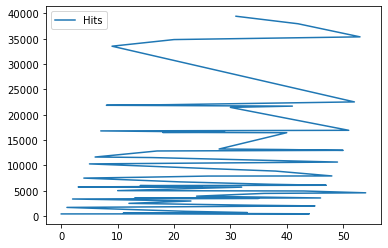

In [10]:
Final = TeamIDRow.groupby(['TeamManager','MetricYear'], as_index= False).agg({
    'Hits': 'sum'
}).sort_values(by=['Hits'], ascending = False)

Final.plot(kind = 'line')
